In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
from sklearn import metrics
%matplotlib inline
import explore
from viz import evaluation_example1, evaluation_example2, evaluation_example3, evaluation_example4, evaluation_example5

Acquire and Prep

In [2]:
PER= pd.read_excel('PER.xlsx')

In [3]:
sal=pd.read_excel('salary.xls')

In [4]:
PER.describe()

,Rk,Age,MP,PER,G,GS,FG,FGA,2P,2PA,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1548.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1515.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,27.003125,34.046563,21.500437,70.513125,64.007752,7.307437,14.872875,6.596938,12.883688,...,0.915062,2.489313,2.614688,19.694500,0.496286,0.514596,0.269328,0.519504,0.779236,0.570520
std,462.02453,3.787919,4.616245,2.696291,14.714964,22.112218,1.820741,3.907622,1.955866,3.847480,...,0.805091,0.758016,0.629852,4.977127,0.050086,0.046090,0.151233,0.042141,0.086822,0.037138
min,1.00000,19.000000,20.000000,18.400000,1.000000,0.000000,2.500000,4.200000,1.400000,2.900000,...,0.000000,0.000000,0.900000,6.500000,0.261000,0.250000,0.000000,0.304000,0.355000,0.433000
25%,400.75000,24.000000,31.500000,19.400000,66.000000,56.000000,6.000000,12.200000,5.200000,10.000000,...,0.300000,2.000000,2.100000,16.200000,0.461000,0.483000,0.189500,0.491750,0.738000,0.544000
50%,800.50000,27.000000,35.000000,20.700000,76.000000,74.000000,7.300000,15.000000,6.500000,12.900000,...,0.600000,2.500000,2.600000,19.600000,0.493000,0.508500,0.314000,0.513000,0.790000,0.567000
75%,1200.25000,29.000000,37.300000,22.900000,81.000000,80.000000,8.500000,17.600000,7.900000,15.525000,...,1.300000,3.000000,3.000000,22.900000,0.524250,0.539000,0.368500,0.545000,0.841000,0.593000
max,1600.00000,40.000000,43.700000,31.700000,85.000000,82.000000,13.400000,27.800000,13.200000,27.000000,...,4.600000,5.700000,4.500000,37.100000,0.714000,0.717000,1.000000,0.714000,1.000000,0.708000


In [5]:
PER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 33 columns):
Rk        1600 non-null int64
Player    1600 non-null object
Season    1600 non-null object
Age       1600 non-null int64
Tm        1600 non-null object
Lg        1600 non-null object
MP        1600 non-null float64
PER       1600 non-null float64
G         1600 non-null int64
GS        1548 non-null float64
FG        1600 non-null float64
FGA       1600 non-null float64
2P        1600 non-null float64
2PA       1600 non-null float64
3P        1600 non-null float64
3PA       1600 non-null float64
FT        1600 non-null float64
FTA       1600 non-null float64
ORB       1600 non-null float64
DRB       1600 non-null float64
TRB       1600 non-null float64
AST       1600 non-null float64
STL       1600 non-null float64
BLK       1600 non-null float64
TOV       1600 non-null float64
PF        1600 non-null float64
PTS       1600 non-null float64
FG%       1600 non-null float64
2P%    

In [6]:
df=pd.DataFrame(PER)

#### Got rid of all the players that did not play a sgnificant number of games in the season, 66 games means the player appeared in 80% of the season

In [7]:
df= df.loc[df['G'] >=66]

#### Clean Data for a Baseline model
Start with points, assists, rebounds to predict PER with a Linear Regreassion Model

In [8]:
base= df[['PTS', 'TRB', 'AST', 'PER']]

In [9]:
base.head()

,PTS,TRB,AST,PER
0,28.4,7.6,7.2,31.7
1,35.0,5.5,5.9,31.7
2,26.8,8.0,7.3,31.6
3,31.5,6.0,5.5,31.6
4,30.1,5.4,6.7,31.5


In [10]:
base= pd.DataFrame(base)


### Exploring data

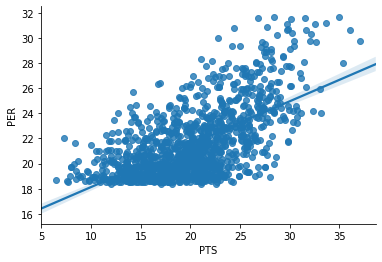

In [11]:
sns.regplot(x="PTS", y="PER", data=base);

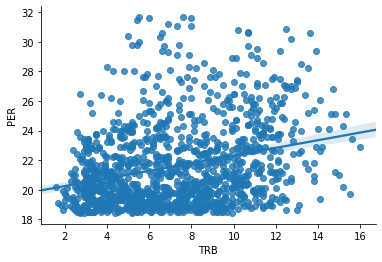

In [12]:
sns.regplot(x="TRB", y="PER", data=base)

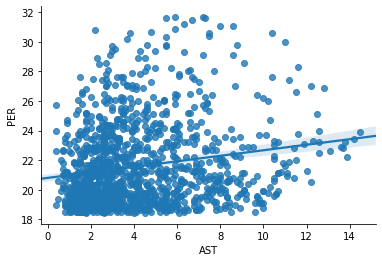

In [13]:
sns.regplot(x="AST", y="PER", data=base)

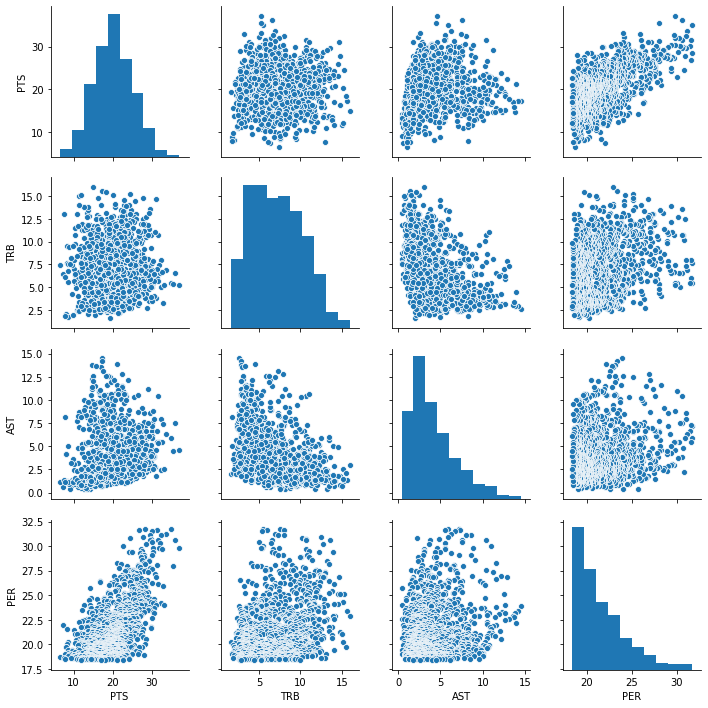

In [14]:
sns.pairplot(base)

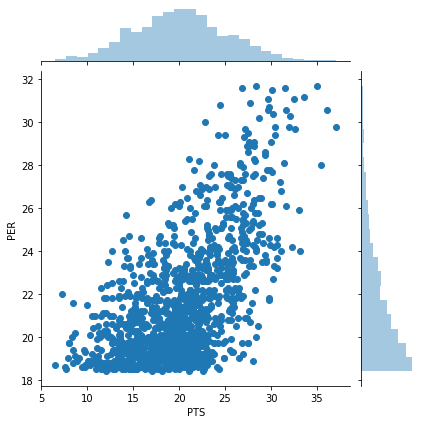

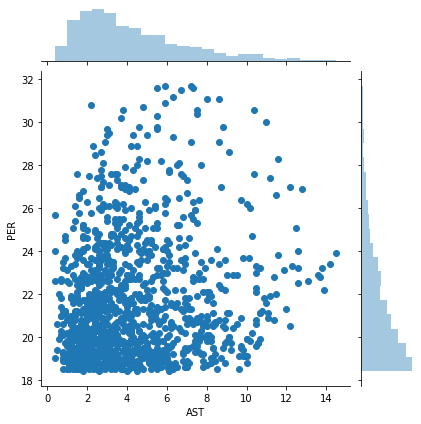

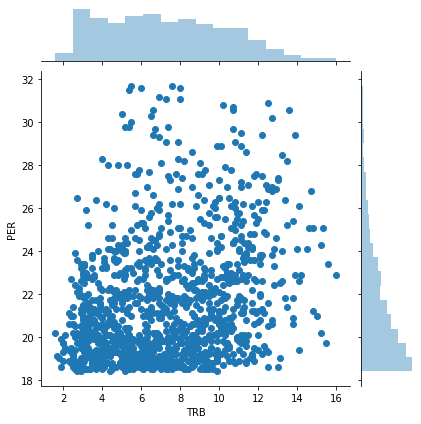

In [15]:
sns.jointplot(x='PTS',y='PER',data=base)
sns.jointplot(x='AST',y='PER',data=base)
sns.jointplot(x='TRB',y='PER',data=base)

#### Training and Testing Data

In [16]:
y= base['PER']
X= base[['PTS', 'TRB', 'AST']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Training the Model
 Now its time to train our model on our training data! Create the object
 mport LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### The y intercept and the slope for our model

In [18]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

11.680783783844012
[0.31417454 0.33586704 0.27391031]


##### obtain the coefficient of determination (𝑅²) with .score()

In [19]:
 r_sq = regressor.score(X_test, y_test)
r_sq

0.5124015727560809

#### Predictions from our Model¶
Let's grab predictions off our test set and see how well it did!

In [20]:
y_pred = regressor.predict(X_test)

#### Check the difference between the actual value and predicted value.

In [21]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(10)

,Actual,Predicted
368,23.1,22.861489
1353,19.0,21.061309
1139,19.6,22.604509
130,26.0,22.020391
801,20.7,20.569904
509,22.1,22.593494
435,22.6,23.059682
2,31.6,24.787143
137,25.8,25.118021
225,24.4,25.156598


In [27]:
y_pred = regressor.predict(X_test)


array([22.86148896, 21.06130868, 22.60450886, 22.02039106, 20.56990386,
       22.59349414, 23.05968158, 24.7871431 , 25.11802132, 25.15659816,
       24.43728726, 22.77262305, 21.06253081, 17.3309398 , 22.47743755,
       17.43282121, 17.90152704, 17.7305461 , 20.26393666, 22.4800306 ,
       19.44217386, 20.45034109, 22.01691676, 23.05233272, 20.33626868,
       20.66239549, 22.41231728, 21.32362597, 19.86865227, 24.4544562 ,
       18.50088765, 20.30550156, 21.07196987, 22.97359378, 22.96998985,
       21.55666448, 21.83409967, 24.83330183, 21.07252067, 20.73438794,
       22.05992074, 20.69004493, 21.21591463, 21.3377322 , 21.09558849,
       23.26914942, 22.47570607, 22.33914855, 22.61939374, 20.54360356,
       24.86720632, 21.54823711, 20.83767655, 24.01089749, 21.78594975,
       21.37955242, 22.71511004, 20.44260032, 19.93959808, 22.18940573,
       24.84684636, 22.59748737, 23.31012644, 19.62703759, 22.32930747,
       20.39561709, 22.70187759, 21.65747826, 21.02253148, 22.50

#### Evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE.

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print (r_sq)

Mean Absolute Error: 1.5774488039936272
Mean Squared Error: 4.177749729187341
Root Mean Squared Error: 2.0439544342248293
0.5124015727560809


In [28]:
#T Test
explore.stats_test(y_train,X_train)

(Ttest_indResult(statistic=array([  7.96912286, 108.7106091 , 140.96289213]), pvalue=array([2.69906484e-15, 0.00000000e+00, 0.00000000e+00])),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                    PER   R-squared (uncentered):                   0.982
 Model:                            OLS   Adj. R-squared (uncentered):              0.982
 Method:                 Least Squares   F-statistic:                          1.729e+04
 Date:                Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
 Time:                        10:41:21   Log-Likelihood:                         -2428.0
 No. Observations:                 972   AIC:                                      4862.
 Df Residuals:                     969   BIC:                                      4877.
 Df Model:                           3                                                  
 Covar

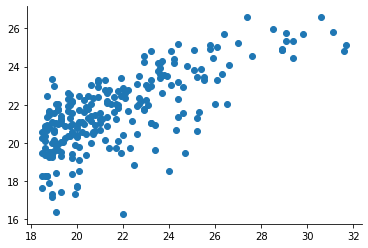

In [31]:
plt.scatter(y_test, y_pred)

##### Feature Engineering start

#### "Starting with original data set W/ the players playing less then 65 games already filtered out

In [54]:
df= df.drop(['Rk', 'Age'], axis=1)

In [68]:
df=pd.DataFrame(df)

In [75]:
 df.dropna(inplace=True)

In [77]:
df.describe()

,MP,PER,G,GS,FG,FGA,2P,2PA,3P,3PA,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,...,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,34.735968,21.626643,77.263766,71.298401,7.490497,15.264121,6.736323,13.160036,0.753552,2.105062,...,0.887300,2.548845,2.615808,20.246892,0.494721,0.513705,0.270082,0.518941,0.785577,0.571091
std,4.233371,2.811671,4.608848,17.575835,1.796829,3.831480,1.947663,3.809168,0.884233,2.277219,...,0.800449,0.731156,0.616599,4.918853,0.046644,0.043113,0.146587,0.039193,0.082893,0.035381
min,20.100000,18.400000,66.000000,0.000000,2.600000,5.200000,2.000000,4.000000,0.000000,0.000000,...,0.000000,0.700000,0.900000,7.600000,0.384000,0.396000,0.000000,0.430000,0.355000,0.472000
25%,32.700000,19.500000,74.000000,71.000000,6.300000,12.600000,5.300000,10.300000,0.000000,0.200000,...,0.300000,2.000000,2.100000,16.900000,0.461250,0.484000,0.194250,0.492000,0.746250,0.545000
50%,35.600000,20.800000,79.000000,77.000000,7.500000,15.300000,6.700000,13.200000,0.300000,1.100000,...,0.600000,2.600000,2.600000,20.200000,0.491500,0.508000,0.316000,0.513000,0.796000,0.568000
75%,37.700000,23.075000,81.000000,81.000000,8.700000,17.900000,8.075000,15.775000,1.300000,3.675000,...,1.300000,3.000000,3.000000,23.200000,0.522000,0.537000,0.368000,0.544000,0.844000,0.594000
max,43.100000,31.700000,85.000000,82.000000,13.400000,27.800000,13.200000,27.000000,5.100000,13.200000,...,4.600000,5.700000,4.200000,37.100000,0.714000,0.717000,1.000000,0.714000,0.981000,0.702000


In [78]:
y1= df['PER']
X1= df.drop('PER', axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=101)

Select K Best with all Variables

In [79]:
from sklearn.feature_selection import SelectKBest
()

()

In [80]:
from sklearn.feature_selection import SelectKBest, f_regression

f_selector = SelectKBest(f_regression, k=6)

f_selector.fit(X_train1, y_train1)

f_support = f_selector.get_support()
f_feature = X_train1.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)

6 selected features
['FG', 'FGA', '2P', 'FT', 'FTA', 'PTS']
